In [1]:
# importing the libraries

In [2]:
import pandas as pd
import numpy as np

In [4]:
# read all the data
bank_data = pd.read_csv("C:\\Users\\harsh\\Downloads\\bank_data (1).csv")
bank_data

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540000,Level 0 Recovery,19,Male
1,1150,486,416.090000,Level 0 Recovery,25,Female
2,380,527,429.350000,Level 0 Recovery,27,Male
3,1838,536,296.990000,Level 0 Recovery,25,Male
4,1995,541,346.385000,Level 0 Recovery,34,Male
...,...,...,...,...,...,...
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female


In [5]:
# look at the first five rows of the bank_data file.
bank_data.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


In [6]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


In [7]:
bank_data.describe()

,id,expected_recovery_amount,actual_recovery_amount,age
count,1882.000000,1882.000000,1882.000000,1882.000000
mean,1035.596174,2759.967588,4000.967837,39.650372
std,591.458429,2019.826565,4576.506350,15.453072
min,6.000000,194.000000,200.425000,18.000000
25%,534.250000,1261.250000,1045.190300,28.000000
50%,1029.500000,2062.000000,2115.446373,35.000000
75%,1551.750000,3569.500000,5417.237207,50.000000
max,2056.000000,9964.000000,34398.479710,84.000000


In [8]:
# getting all the number of missing data points in each column
bank_data.isnull().sum()

id                          0
expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64

In [9]:
# Graphical Explore

In [10]:
# Extract the columns for age and expected recovery amount
age_data = bank_data["age"]
recovery_amount_data = bank_data["expected_recovery_amount"]
# Filter the data within the specified range (2000)
filtered_data = bank_data[(bank_data["expected_recovery_amount"] >= 0) & (bank_data["expected_recovery_amount"] <= 2000)]
age_data_filtered= filtered_data["age"]
recovery_amount_data_filtered = filtered_data["expected_recovery_amount"]

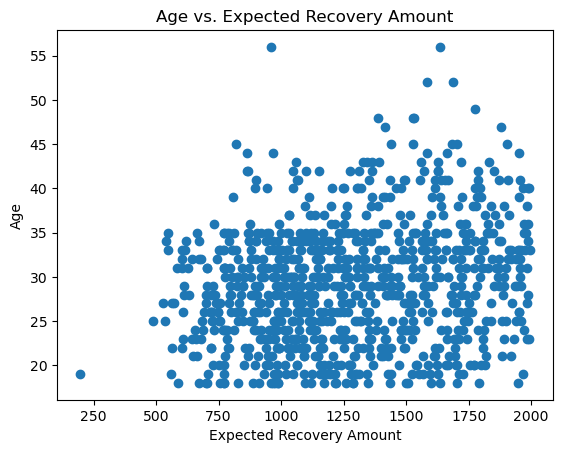

In [11]:
import matplotlib.pyplot as plt
# Scatter plot with different colors for male and female data points
# plt.scatter(bank_data['expected_recovery_amount'][bank_data['sex'] == 'Male'], bank_data['age'][bank_data['sex'] == 'Male'], c='blue', label='Male')
# plt.scatter(bank_data['expected_recovery_amount'][bank_data['sex'] == 'Female'], bank_data['age'][bank_data['sex'] == 'Female'], c='red', label='Female')
# Assume you have age_data and recovery_amount_data as lists/arrays containing the respective data points
plt.scatter(recovery_amount_data_filtered,age_data_filtered)
plt.xlabel("Expected Recovery Amount")
plt.ylabel("Age")
plt.title("Age vs. Expected Recovery Amount")
plt.show()

In [12]:
# Statical tests

In [13]:
from scipy.stats import ttest_ind
# Create two data subsets based on the threshold value
above_threshold_data = age_data_filtered[recovery_amount_data_filtered > 1000]
below_threshold_data = age_data_filtered[recovery_amount_data_filtered <= 1000]

# Perform the t-test
t_stat, p_value = ttest_ind(above_threshold_data, below_threshold_data)

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("There is a significant difference in age across the $1000 threshold.")
else:
    print("There is no significant difference in age across the $1000 threshold.")

There is a significant difference in age across the $1000 threshold.


In [15]:
from scipy.stats import chi2_contingency

# Create the contingency table
above_threshold_male = len(bank_data[(recovery_amount_data_filtered > 1000) & (bank_data == 'Male')])
above_threshold_female = len(bank_data[(recovery_amount_data_filtered > 1000) & (bank_data == 'Female')])
below_threshold_male = len(bank_data[(recovery_amount_data_filtered <= 1000) & (bank_data == 'Male')])
below_threshold_female = len(bank_data[(recovery_amount_data_filtered <= 1000) & (bank_data == 'Female')])

contingency_table = [[above_threshold_male, above_threshold_female], [below_threshold_male, below_threshold_female]]

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("There is a significant difference in sex distribution across the $1000 threshold.")
else:
    print("There is no significant difference in sex distribution across the $1000 threshold.")   

There is no significant difference in sex distribution across the $1000 threshold.


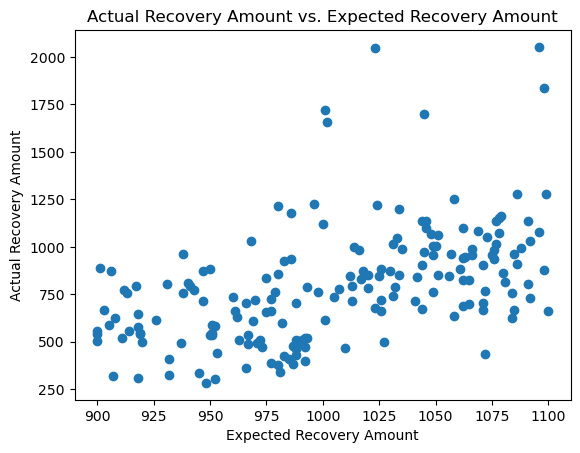

In [16]:
import matplotlib.pyplot as plt

actual_recovery_amount_data = bank_data["actual_recovery_amount"]

# Filter data within the specified range (1100)
filtered_data = [(expected, actual) for expected, actual in zip(recovery_amount_data, actual_recovery_amount_data) if 900 <= expected <= 1100]

# Unzip the filtered data to separate expected and actual recovery amounts
expected_recovery_amount_filtered, actual_recovery_amount_filtered = zip(*filtered_data)

# Create the scatter plot
plt.scatter(expected_recovery_amount_filtered, actual_recovery_amount_filtered)
plt.xlabel("Expected Recovery Amount")
plt.ylabel("Actual Recovery Amount")
plt.title("Actual Recovery Amount vs. Expected Recovery Amount")
plt.show()

In [17]:
from scipy.stats import kruskal
# Define the threshold and window ranges
threshold = 1000
wider_window_start = 900
wider_window_end = 1100
narrower_window_start = 950
narrower_window_end = 1050

# Filter data within the specified wider window (1100)
wider_window_data = [actual for expected, actual in zip(recovery_amount_data, actual_recovery_amount_data) if wider_window_start <= expected <= wider_window_end]

# Filter data within the specified narrower window (1050)
narrower_window_data = [actual for expected, actual in zip(recovery_amount_data, actual_recovery_amount_data) if narrower_window_start <= expected <= narrower_window_end]

# Perform the Kruskal-Wallis test for both windows
kw_stat_wider, p_value_wider = kruskal(wider_window_data[:len(wider_window_data)//2], wider_window_data[len(wider_window_data)//2:])
kw_stat_narrower, p_value_narrower = kruskal(narrower_window_data[:len(narrower_window_data)//2], narrower_window_data[len(narrower_window_data)//2:])

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-values are less than the significance level
if p_value_wider < alpha:
    print("There is a significant difference in actual recovery amount between the wider window groups.")
else:
    print("There is no significant difference in actual recovery amount between the wider window groups.")

if p_value_narrower < alpha:
    print("There is a significant difference in actual recovery amount between the narrower window groups.")
else:
    print("There is no significant difference in actual recovery amount between the narrower window groups.")

There is a significant difference in actual recovery amount between the wider window groups.
There is a significant difference in actual recovery amount between the narrower window groups.


In [18]:
import statsmodels.api as sm

# Prepare the data as a DataFrame
data = pd.DataFrame({'Expected Recovery Amount': recovery_amount_data, 'Actual Recovery Amount': actual_recovery_amount_data})

# Add a constant term to the independent variable for the intercept in the regression model
data['Intercept'] = 1

# Define the independent and dependent variables
X = data[['Intercept', 'Expected Recovery Amount']]
Y = data['Actual Recovery Amount']

# Build the regression model
model = sm.OLS(Y, X).fit()

# Get the model summary to assess the strength and significance of the relationship
print(model.summary())
     

                              OLS Regression Results                              
Dep. Variable:     Actual Recovery Amount   R-squared:                       0.817
Model:                                OLS   Adj. R-squared:                  0.817
Method:                     Least Squares   F-statistic:                     8378.
Date:                    Sat, 22 Jul 2023   Prob (F-statistic):               0.00
Time:                            16:53:25   Log-Likelihood:                -16936.
No. Observations:                    1882   AIC:                         3.388e+04
Df Residuals:                        1880   BIC:                         3.389e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [19]:
# Prepare the data as a DataFrame
data = pd.DataFrame({'Expected Recovery Amount': recovery_amount_data, 'Actual Recovery Amount': actual_recovery_amount_data})

# Add a binary indicator variable for the true threshold (above vs. below $1000)
data['Above Threshold'] = (data['Expected Recovery Amount'] > 1000).astype(int)

# Add a constant term to the independent variables for the intercept in the regression model
data['Intercept'] = 1

# Define the independent variables (including the intercept and the indicator variable)
X = data[['Intercept', 'Expected Recovery Amount', 'Above Threshold']]

# Define the dependent variable
Y = data['Actual Recovery Amount']

# Build the regression model
model = sm.OLS(Y, X).fit()

# Get the model summary to assess the fit and significance of the coefficients
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     Actual Recovery Amount   R-squared:                       0.819
Model:                                OLS   Adj. R-squared:                  0.818
Method:                     Least Squares   F-statistic:                     4242.
Date:                    Sat, 22 Jul 2023   Prob (F-statistic):               0.00
Time:                            16:53:52   Log-Likelihood:                -16926.
No. Observations:                    1882   AIC:                         3.386e+04
Df Residuals:                        1879   BIC:                         3.387e+04
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [21]:
# Prepare the data as a DataFrame
data = pd.DataFrame({'Expected Recovery Amount': recovery_amount_data, 'Actual Recovery Amount': actual_recovery_amount_data})

# Filter the data within the new window (1050)
data_filtered = data[(data['Expected Recovery Amount'] >= 950) & (data['Expected Recovery Amount'] <= 1050)]

# Add a binary indicator variable for the true threshold (Above Threshold)
data_filtered['Above Threshold'] = (data_filtered['Expected Recovery Amount'] > 1000).astype(int)

# Add a constant term to the independent variables for the intercept in the regression model
data_filtered['Intercept'] = 1

# Define the independent variables (including the intercept and the indicator variable)
X = data_filtered[['Intercept', 'Expected Recovery Amount', 'Above Threshold']]

# Define the dependent variable
Y = data_filtered['Actual Recovery Amount']

# Build the regression model
model = sm.OLS(Y, X).fit()

# Get the model summary to assess the fit and significance of the coefficients
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     Actual Recovery Amount   R-squared:                       0.270
Model:                                OLS   Adj. R-squared:                  0.255
Method:                     Least Squares   F-statistic:                     17.90
Date:                    Sat, 22 Jul 2023   Prob (F-statistic):           2.42e-07
Time:                            16:54:45   Log-Likelihood:                -700.65
No. Observations:                     100   AIC:                             1407.
Df Residuals:                          97   BIC:                             1415.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

C:\Users\harsh\AppData\Local\Temp\ipykernel_5916\3676211168.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Above Threshold'] = (data_filtered['Expected Recovery Amount'] > 1000).astype(int)
C:\Users\harsh\AppData\Local\Temp\ipykernel_5916\3676211168.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Intercept'] = 1


In [ ]:
# Intercept: The intercept term in the regression model is -1102.7036. 
# It represents the estimated actual recovery amount when both the "Expected Recovery Amount" and "Above Threshold" are zero. However, in this context, it may not have practical significance since there are no expected recovery amounts close to zero in your dataset

# Expected Recovery Amount: The coefficient for "Expected Recovery Amount" is 1.7713. 
# It indicates that for each unit increase in the expected recovery amount, the actual recovery amount is estimated to increase by approximately $1.77. 
# However, this coefficient is not statistically significant at the conventional significance level (e.g., 0.05), as indicated by the p-value (0.350). 
# This suggests that there is no strong evidence that the expected recovery amount has a significant impact on the actual recovery amount in this model.